In [4]:
import theano
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from LinearRegressionTheano import LinearRegressionTheano

def plot_cost(costs, costs_with_reg):
    fig, ax = plt.subplots(1, 1, figsize=(15,10))
    ax.plot(costs, label='Cost')
    ax.plot(costs_with_reg, label='Cost with regression')
    ax.set_ylabel("Cost")
    ax.set_xlabel("Iteration")
    
    plt.legend()
    plt.show()
    
def plot_data(X, y, coef, labels):
    fig, ax = plt.subplots(1, 1, figsize=(15,10))
    for (k, b), labels in zip(coef, labels):
        ax.plot(X, k*X + b, label=labels)
    ax.scatter(X, y)
    plt.legend()
    plt.show()    

# Create data

Create line data with noise and plot it

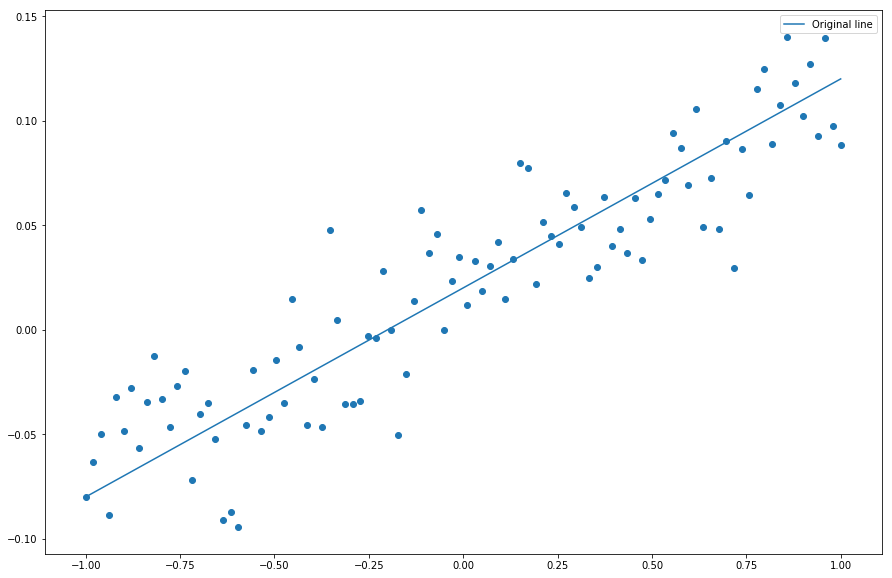

In [2]:
k = 0.1
b = 0.02

X = np.linspace(-1, 1, 100)
y = k*X + 0.025*np.random.randn(100) + b

X = X.astype(dtype=theano.config.floatX).reshape(-1, 1)
y = y.astype(dtype=theano.config.floatX)
    
plot_data(X, y, coef=[(k, b)], labels=['Original line'])

# Fit data with linear regression based on Theano

Fit model and get coefficients from it. 

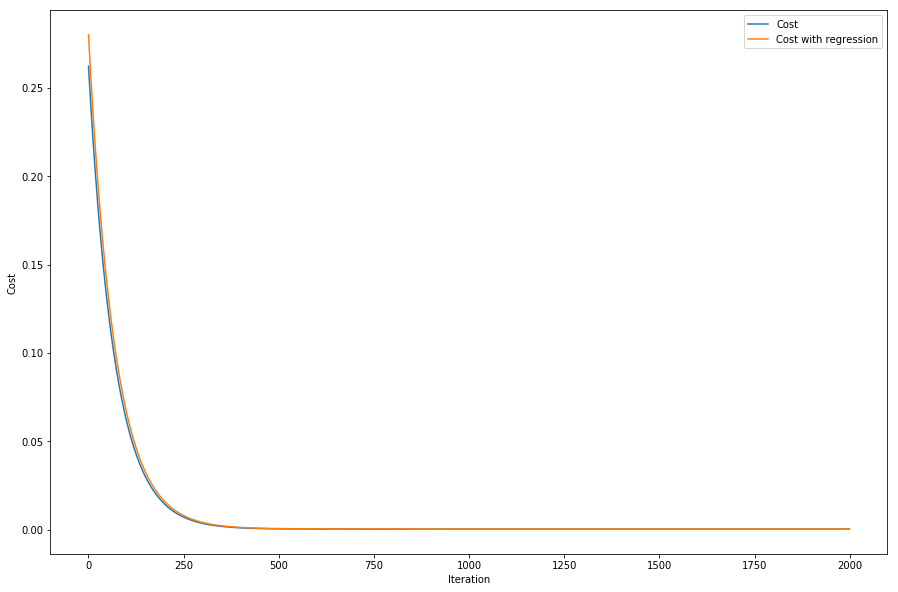

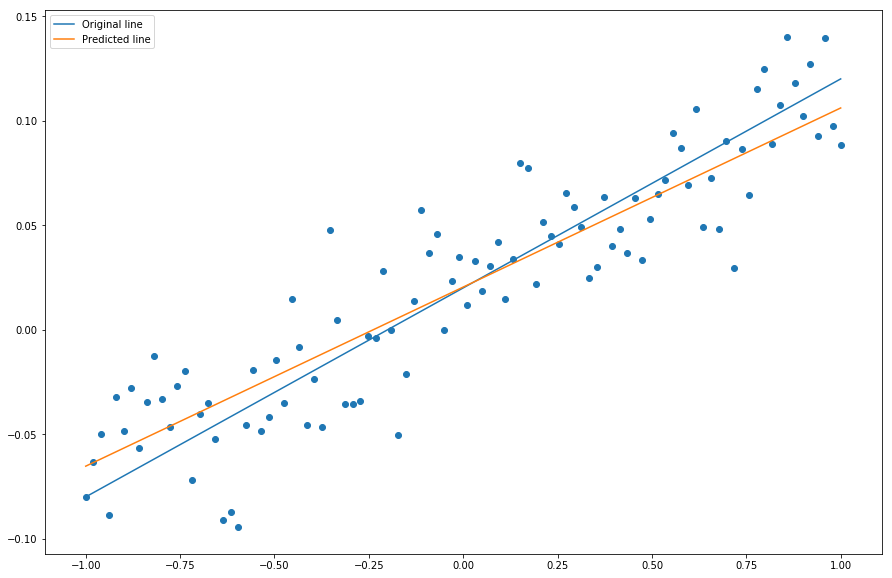

In [3]:
linreg = LinearRegressionTheano(seed=10)
linreg.fit(X, y, reg_coef=0.01, a=0.02, max_iter=2000)
plot_cost(linreg.costs, linreg.costs_with_regression)

k_pred, b_pred = linreg.get_coefficients() 
k_pred = k_pred[0]
plot_data(X, y, coef=[(k, b), (k_pred, b_pred)], labels=['Original line', 'Predicted line'])